****Проектная работа по модулю "Математика и статистика в Python"****

**1.Загрузить файл hr.csv.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
data_hr = pd.read_csv("HR.csv")
data_hr.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


Пояснения к колонкам:

satisfaction_level - уровень удовлетворенности работой

last_evaluation - уровень последней оценки работы

number_project -количество проектов

average_montly_hours - среднее количество часов в месяц работы

time_spend_company - шкала от 2 до 10, отражающее время работы в компании

Work_accident - наличие инцидента на рабочем месте

left - ушел ли работник или нет

promotion_last_5years - факт повышения в течение 5 лет

sales - департамент работника

salary - уровень зарплаты

**2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).**

In [3]:
data_hr.describe()

# mean - соотвествует среднему
# 50% - соответсвует медиане
# min - соответсвует минимуму
# max - соответсвует максимуму
# std - соответсвует ср. отклонению

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
data_hr.mode()    # моды

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


**3.Рассчитать и визуализировать корреляционную матрицу для переменных.**

In [5]:
corr = data_hr.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


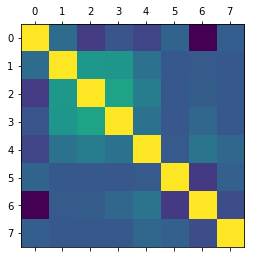

In [6]:
# вариант 1 
plt.matshow(corr)

In [7]:
# вариант 2 
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1,0.105021,-0.14297,-0.0200481,-0.100866,0.0586972,-0.388375,0.0256052
last_evaluation,0.105021,1,0.349333,0.339742,0.131591,-0.00710429,0.00656712,-0.00868377
number_project,-0.14297,0.349333,1,0.417211,0.196786,-0.00474055,0.0237872,-0.00606396
average_montly_hours,-0.0200481,0.339742,0.417211,1,0.127755,-0.0101429,0.0712872,-0.00354441
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1,0.00212042,0.144822,0.0674329
Work_accident,0.0586972,-0.00710429,-0.00474055,-0.0101429,0.00212042,1,-0.154622,0.0392454
left,-0.388375,0.00656712,0.0237872,0.0712872,0.144822,-0.154622,1,-0.0617881
promotion_last_5years,0.0256052,-0.00868377,-0.00606396,-0.00354441,0.0674329,0.0392454,-0.0617881,1


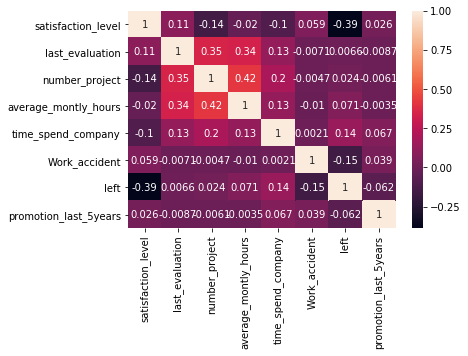

In [8]:
# вариант 3 
import seaborn as sns
sns.heatmap(corr, annot = True)

**4.Визуализировать несколько взаимосвязей между переменными.**

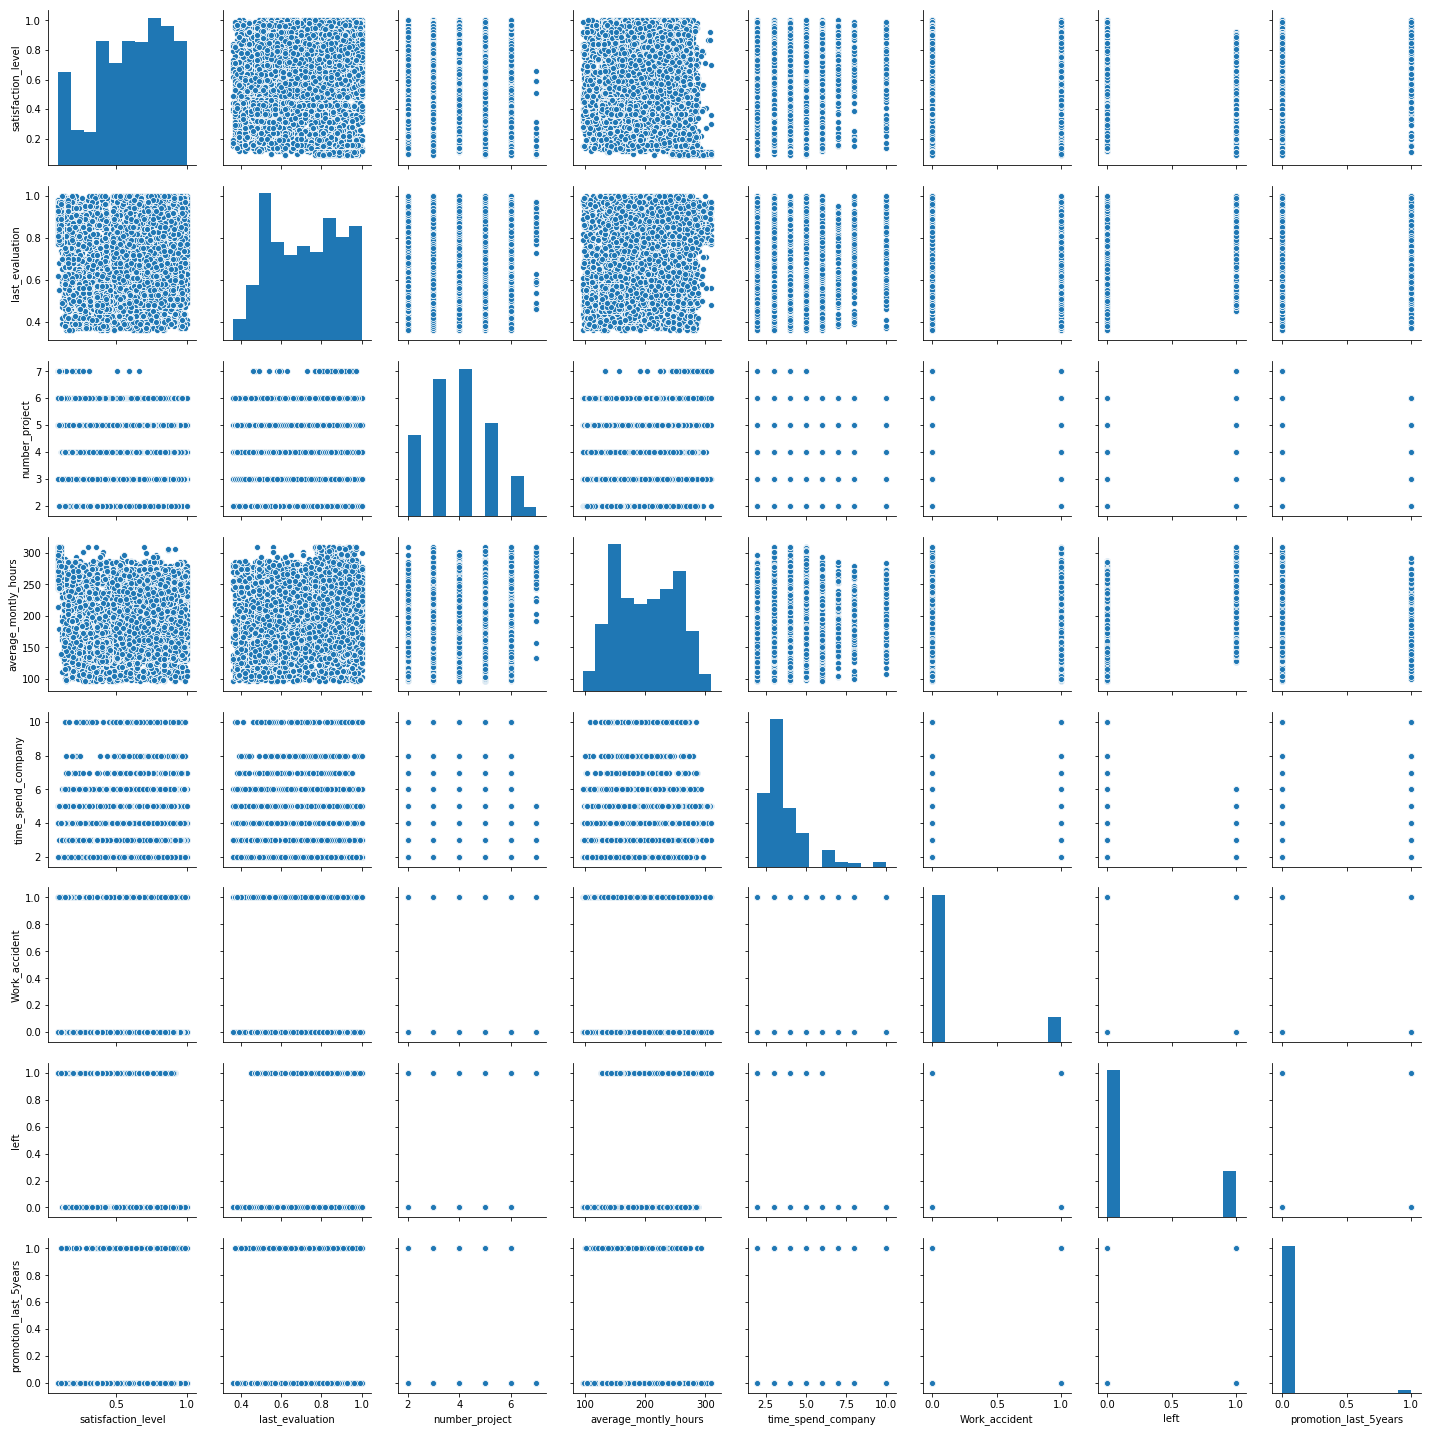

In [9]:
sns.pairplot(data_hr)

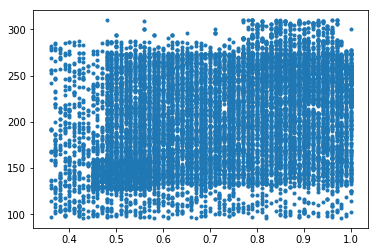

In [10]:
plt.scatter(data_hr.last_evaluation, data_hr.average_montly_hours, marker = ".")

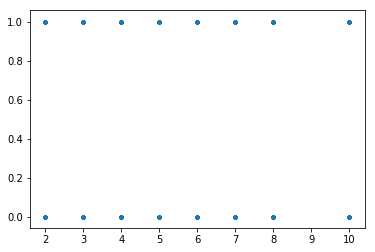

In [11]:
plt.scatter(data_hr.time_spend_company, data_hr.Work_accident, marker = ".") 

**5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.**

5.1. Проверим взаимосвязь между: *average_montly_hours - среднее количество часов в месяц работы* и *promotion_last_5years - факт повышения в течение 5 лет*

H0: среднее количество чаcов в месяц > 200 часов не влияет на факт повышения

H1: среднее кол-во часов работы в месяц > 200 часов изменяет факт повышения 

In [45]:
data_hr.groupby("promotion_last_5years").count()["left"]

promotion_last_5years
0    14680
1      319
Name: left, dtype: int64

In [49]:
data_1 = data_hr.loc[data_hr["average_montly_hours"]>200, "promotion_last_5years"]
data_2 = data_hr.loc[data_hr["average_montly_hours"]<=200, "promotion_last_5years"]
sts.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=0.6814851570273432, pvalue=0.4955750787089088)

Значение pvalue = 0.495575, поэтому нельзя отвергнуть гипотезу H0. Таким образом высокое число часов работы в месяц (более 200) не влияет на факт повышения за последние 5 лет 

5.2. Проверим взаимосвязь между: average_montly_hours - среднее количество часов в месяц работы и last_evaluation - уровень последней оценки работы

H0: среднее количество чаcов в месяц > 200 часов не связано с уровнем последней оценки работы

H1: среднее кол-во часов работы в месяц > 200 часов связано с уровнем последней оценки работы

In [47]:
data_1 = data_hr.loc[data_hr["average_montly_hours"]>200, "last_evaluation"]
data_2 = data_hr.loc[data_hr["average_montly_hours"]<=200, "last_evaluation"]
sts.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=37.64694709686235, pvalue=1.8663035106028564e-296)

Значение pvalue = 1.8663, поэтому нельзя отвергнуть гипотезу H0. Таким образом высокое число часов работы в месяц (более 200) не влияет на уровень последней оценки работы 

**6.Рассчитать сколько работников работает в каждом департаменте.**

In [12]:
data_hr[['sales', 'left']].groupby("sales").count()

,left
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


**7.Показать распределение сотрудников по зарплатам.**

In [20]:
salary = data_hr[['salary', 'left']].groupby("salary").count().reset_index()
salary

,salary,left
0,high,1237
1,low,7316
2,medium,6446


<BarContainer object of 3 artists>

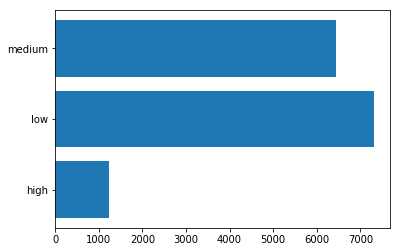

In [22]:
plt.barh(salary['salary'], salary['left'])

**8.Показать распределение сотрудников по зарплатам совместно с департаментами.**

In [30]:
salary_depart = data_hr.groupby(['sales', 'salary']).count()['left']
salary_depart

sales        salary
IT           high        83
             low        609
             medium     535
RandD        high        51
             low        364
             medium     372
accounting   high        74
             low        358
             medium     335
hr           high        45
             low        335
             medium     359
management   high       225
             low        180
             medium     225
marketing    high        80
             low        402
             medium     376
product_mng  high        68
             low        451
             medium     383
sales        high       269
             low       2099
             medium    1772
support      high       141
             low       1146
             medium     942
technical    high       201
             low       1372
             medium    1147
Name: left, dtype: int64

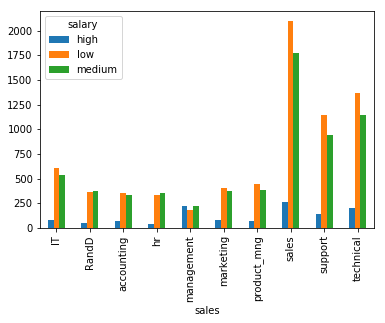

In [32]:
salary_depart.unstack().plot(kind = 'bar')

**9.Сколько сотрудников покинули компанию.**

In [34]:
data_hr[data_hr['left'] == 1].count()[0]

3571

**10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.**

По степени корреляции (п.3) можно судить о наибольшей связи показателя 'left' с 'satisfaction_level' (обратная связь) и с 'time_spend_company' (хотя уровень связи невысок, но выше оставшихся). 

10.1. Проверим, зависит ли кол-во уволенных от степени удовлетворенности работника.

H0: кол-во уволившихся не зависит от степени удовлетворенности satisfaction_level

H1: кол-во уволившихся зависит от степени удовлетворенности satisfaction_level

In [50]:
data_1 = data_hr.loc[data_hr["left"]==1, "satisfaction_level"]
data_2 = data_hr.loc[data_hr["left"]==0, "satisfaction_level"]
sts.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=-51.61280155890104, pvalue=0.0)

Вывод: между двумя группами (уволившимися и не уволившимися) есть различия по степени удовлетворенности работой, отвергаем гипотезу H0.

10.2. Проверим, зависит ли кол-во уволенных от времени, проведенного в компании.

H0: кол-во уволившихся не зависит от времени работы в компании time_spend_company

H1: кол-во уволившихся зависит от времени работы в компании time_spend_company

In [51]:
data_1 = data_hr.loc[data_hr["left"]==1, "time_spend_company"]
data_2 = data_hr.loc[data_hr["left"]==0, "time_spend_company"]
sts.ttest_ind(data_1, data_2)

Ttest_indResult(statistic=17.924210234916142, pvalue=4.207680457692835e-71)

Вывод: между двумя группами (уволившимися и не уволившимися) есть различия по времени, проведенному в компании, отвергаем гипотезу H0.

**11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в лк на сайте**